In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\MANI\Desktop\Fraud Analytics')

In [2]:
df1 = pd.read_csv('fraudTrain.csv')

Data Cleaning

In [3]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [4]:
df1 = df1.drop(columns=['zip','lat','long','city_pop','unix_time','merch_lat','merch_long','cc_num'])

In [45]:
df1.head(5)

,merchant,category,amt,gender,street,city,state,job,trans_num,is_fraud,date,time,name,dayofweek,month,year,hour
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,False,2019-01-01,00:00:18,Jennifer Banks,Tuesday,January,2019,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,False,2019-01-01,00:00:44,Stephanie Gill,Tuesday,January,2019,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,False,2019-01-01,00:00:51,Edward Sanchez,Tuesday,January,2019,NaN
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,False,2019-01-01,00:01:16,Jeremy White,Tuesday,January,2019,NaN
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,False,2019-01-01,00:03:06,Tyler Garcia,Tuesday,January,2019,NaN


In [6]:
df1['date']=pd.to_datetime(df1['trans_date_trans_time'])
df1['time']=df1['date'].dt.time
df1['date']=df1['date'].dt.date

In [7]:
df1=df1.drop(columns=['trans_date_trans_time'])

In [8]:
df1.head(1)

,merchant,category,amt,first,last,gender,street,city,state,job,dob,trans_num,is_fraud,date,time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,0,2019-01-01,00:00:18


In [9]:
df1['name']=df1['first']+' '+df1['last']

In [10]:
df1=df1.drop(columns=['first','last'])

In [11]:
df1.head(1)

,merchant,category,amt,gender,street,city,state,job,dob,trans_num,is_fraud,date,time,name
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,0,2019-01-01,00:00:18,Jennifer Banks


In [12]:
df1['dob']=pd.to_datetime(df1['dob'])

In [13]:
df1['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [14]:
df1['is_fraud']=df1['is_fraud'].astype('bool')

In [15]:
df1[df1['amt']<0]

,merchant,category,amt,gender,street,city,state,job,dob,trans_num,is_fraud,date,time,name


In [16]:
df1.isnull().sum()

merchant     0
category     0
amt          0
gender       0
street       0
city         0
state        0
job          0
dob          0
trans_num    0
is_fraud     0
date         0
time         0
name         0
dtype: int64

In [17]:
df1=df1.drop(columns=['dob'])

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9


In [19]:
df1.describe(include='object').T

,count,unique,top,freq
merchant,1296675,693,fraud_Kilback LLC,4403
category,1296675,14,gas_transport,131659
gender,1296675,2,F,709863
street,1296675,983,0069 Robin Brooks Apt. 695,3123
city,1296675,894,Birmingham,5617
state,1296675,51,TX,94876
job,1296675,494,Film/video editor,9779
trans_num,1296675,1296675,0b242abb623afc578575680df30655b9,1
date,1296675,537,2019-12-08,6428
time,1296675,86400,20:08:30,38


EDA

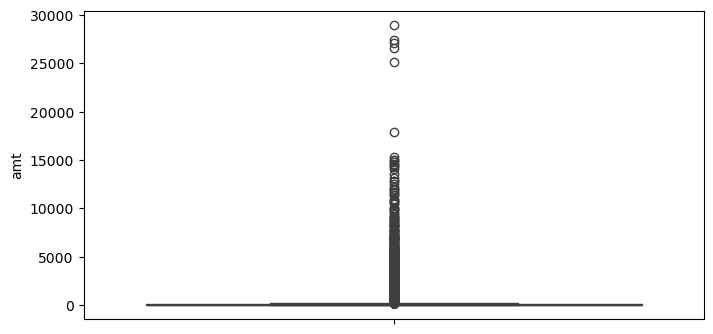

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df1,y='amt')
plt.show()

In [21]:
d=np.array(df1['amt'])
Q1=np.percentile(d,25)
Q3=np.percentile(d,75)
IQR=Q3-Q1

In [22]:
df2=df1[df1['amt']<(Q3+1.5*IQR)]

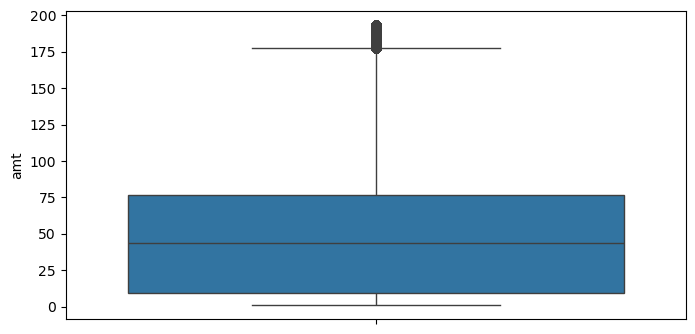

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2,y='amt')
plt.show()

In [24]:
df1.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'job', 'trans_num', 'is_fraud', 'date', 'time', 'name'],
      dtype='object')

In [25]:
df3=df1.groupby('is_fraud')['trans_num'].count().reset_index()
df3.columns = ['is_fruad','count']
df3.head()

,is_fruad,count
0,False,1289169
1,True,7506


<Axes: xlabel='is_fraud'>

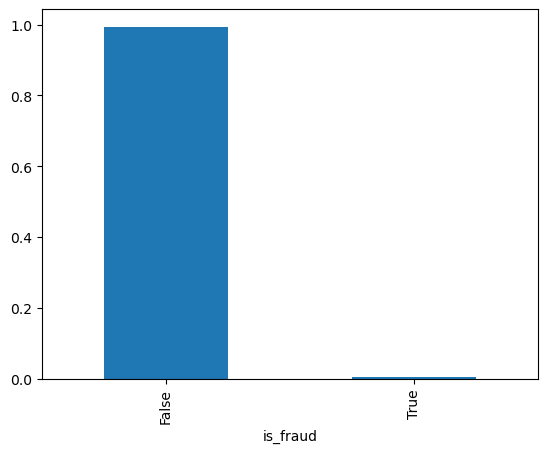

In [26]:
df1['is_fraud'].value_counts(normalize=True).plot(kind='bar')

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   merchant   1296675 non-null  object 
 1   category   1296675 non-null  object 
 2   amt        1296675 non-null  float64
 3   gender     1296675 non-null  object 
 4   street     1296675 non-null  object 
 5   city       1296675 non-null  object 
 6   state      1296675 non-null  object 
 7   job        1296675 non-null  object 
 8   trans_num  1296675 non-null  object 
 9   is_fraud   1296675 non-null  bool   
 10  date       1296675 non-null  object 
 11  time       1296675 non-null  object 
 12  name       1296675 non-null  object 
dtypes: bool(1), float64(1), object(11)
memory usage: 120.0+ MB


In [58]:
df1['date']=pd.to_datetime(df1['date'])
df1['dayofweek']=df1['date'].dt.day_name()
df1['month']=df1['date'].dt.month_name()
df1['year']=df1['date'].dt.year

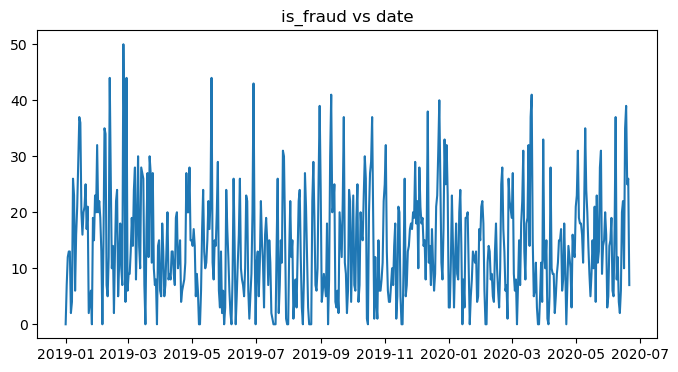

In [164]:
df4=df1.groupby('date')['is_fraud'].sum().reset_index()
plt.figure(figsize=(8,4))
plt.plot(df4['date'],df4['is_fraud'])
plt.title('is_fraud vs date')
plt.show()

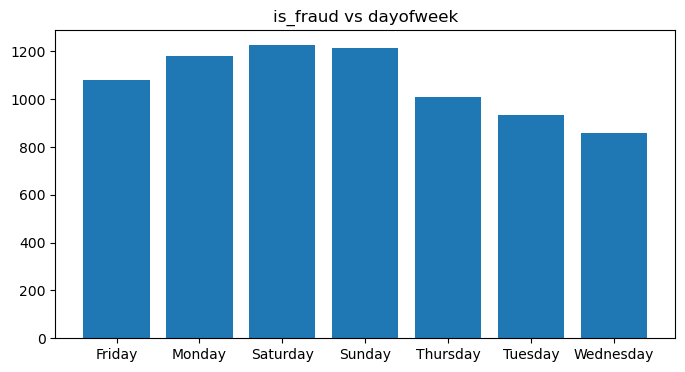

In [78]:
df4=df1.groupby('dayofweek')['is_fraud'].sum().reset_index()
df4.columns = ['dayofweek','count']
plt.figure(figsize=(8,4))
plt.bar(df4['dayofweek'],df4['count'])
plt.title('is_fraud vs dayofweek')
plt.show()

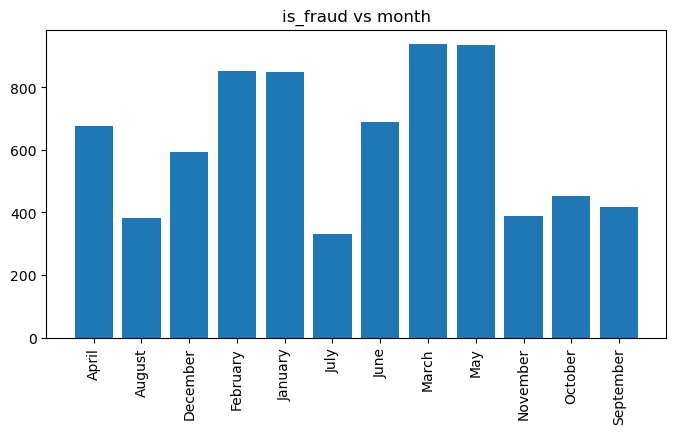

In [81]:
df4=df1.groupby('month')['is_fraud'].sum().reset_index()
df4.columns = ['month','count']
plt.figure(figsize=(8,4))
plt.bar(df4['month'],df4['count'])
plt.title('is_fraud vs month')
plt.xticks(rotation=90)
plt.show()

In [67]:
df1['hour']=df1['time'].dt.hour

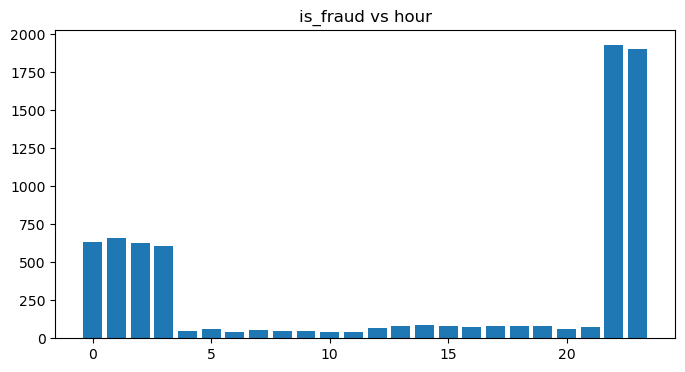

In [69]:
df4=df1.groupby('hour')['is_fraud'].sum().reset_index()
df4.columns = ['hour','count']
plt.figure(figsize=(8,4))
plt.bar(df4['hour'],df4['count'])
plt.title('is_fraud vs hour')
plt.xticks()
plt.show()

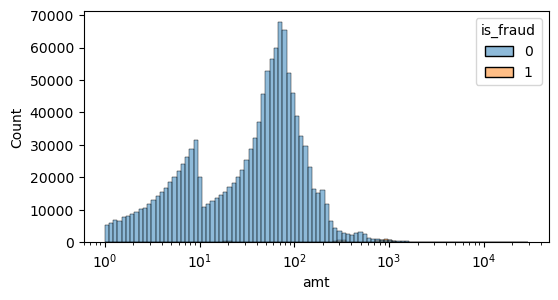

In [76]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=100, log_scale=True)
plt.show()

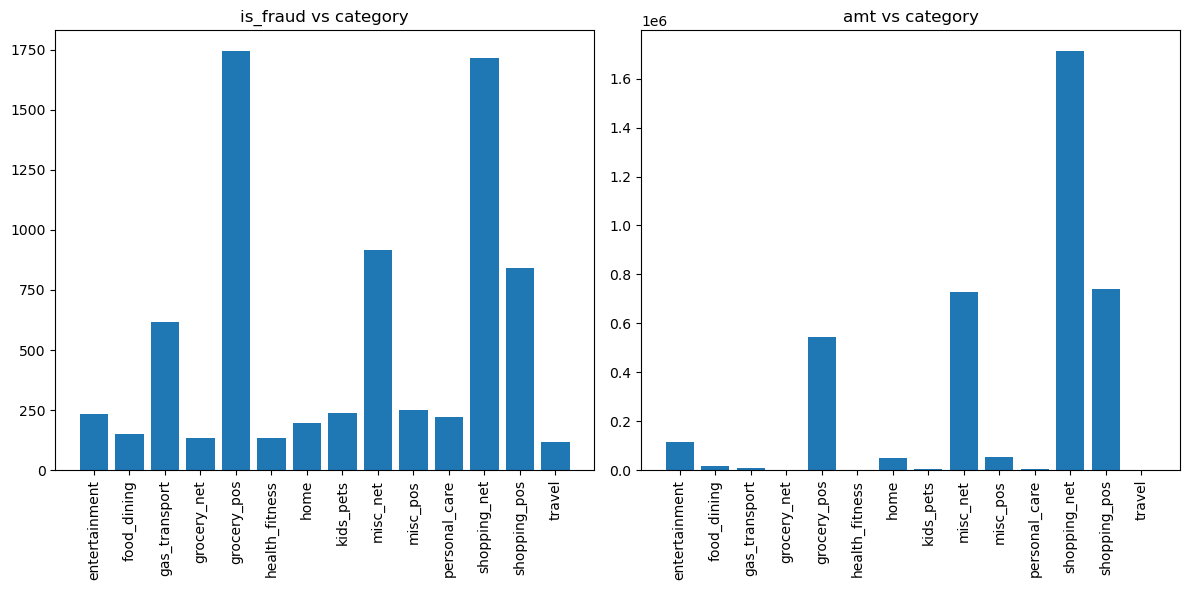

In [87]:
df4=df1.groupby('category')['is_fraud'].sum().reset_index()
df4.columns = ['category','count']
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(df4['category'],df4['count'])
plt.title('is_fraud vs category')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df5=df1[df1['is_fraud']==True].groupby('category')['amt'].sum().reset_index()
df5.columns = ['category','amt']
plt.bar(df5['category'],df5['amt'])
plt.title('amt vs category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

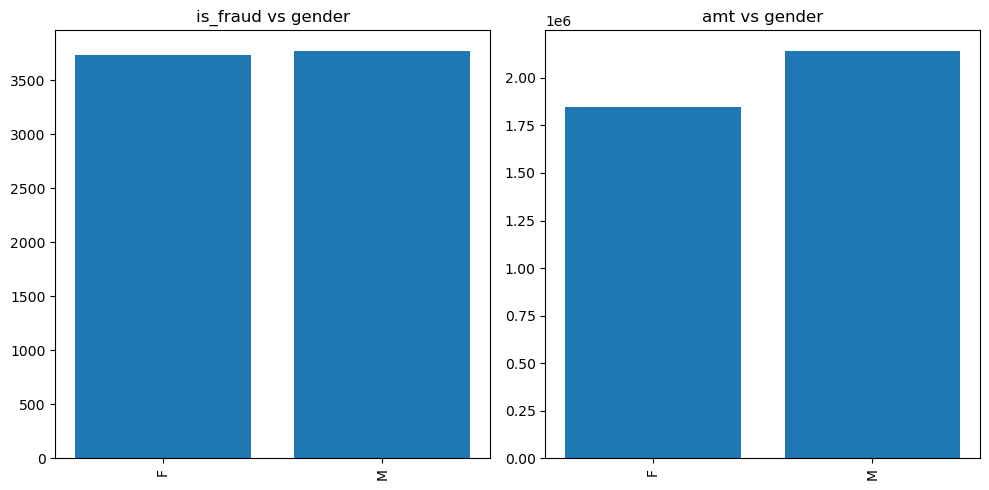

In [90]:
df4=df1.groupby('gender')['is_fraud'].sum().reset_index()
df4.columns = ['gender','count']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df4['gender'],df4['count'])
plt.title('is_fraud vs gender')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df5=df1[df1['is_fraud']==True].groupby('gender')['amt'].sum().reset_index()
df5.columns = ['gender','amt']
plt.bar(df5['gender'],df5['amt'])
plt.title('amt vs gender')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

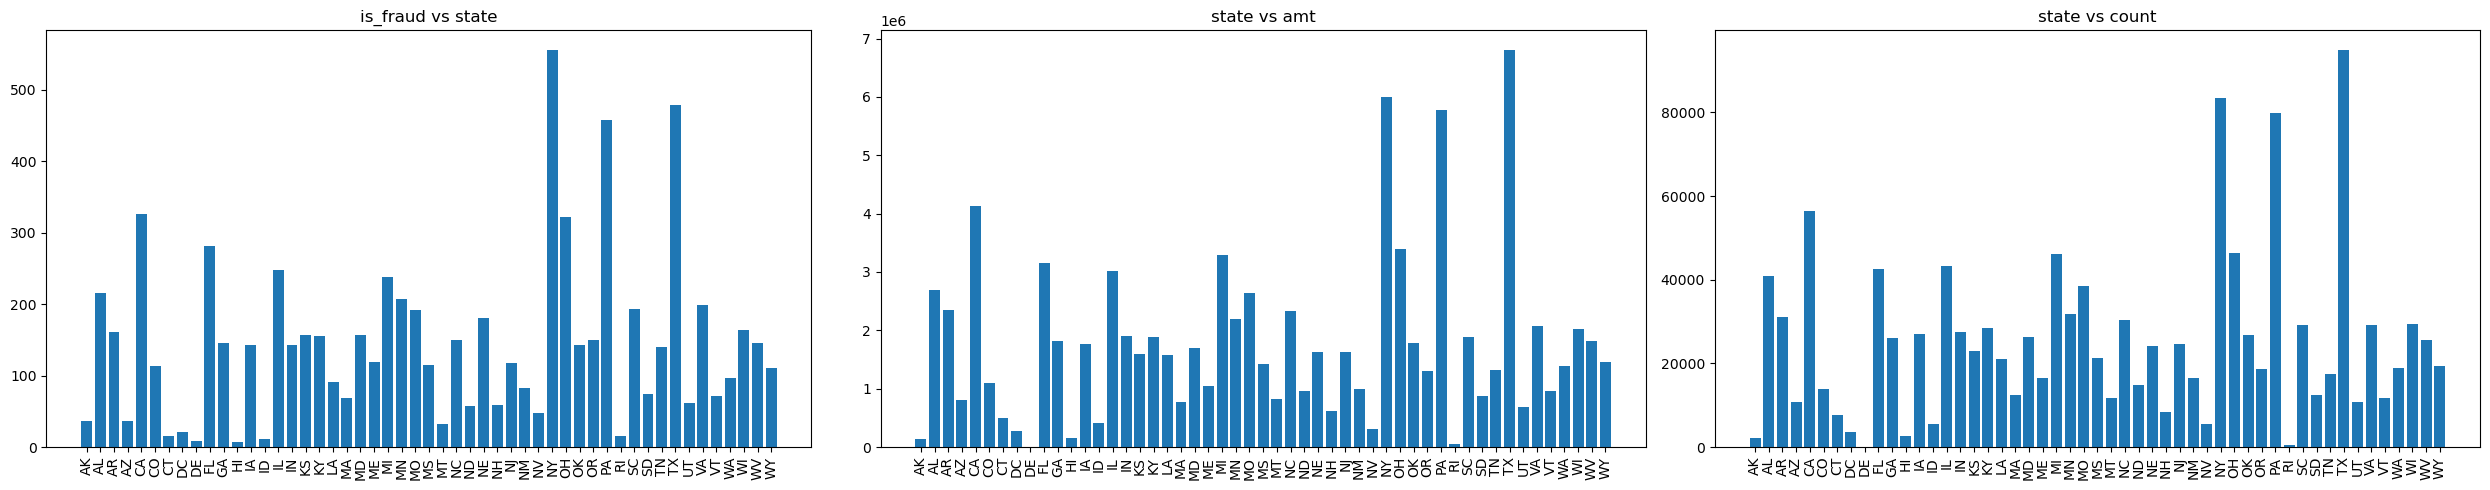

In [95]:
df4=df1.groupby('state')['is_fraud'].sum().reset_index()
df4.columns = ['state','count']
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.bar(df4['state'],df4['count'])
plt.title('is_fraud vs state')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
df5=df1.groupby('state')['amt'].sum().reset_index()
df5.columns = ['state','amt']
plt.bar(df5['state'],df5['amt'])
plt.title('state vs amt')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
df5=df1.groupby('state')['name'].count().reset_index()
df5.columns = ['state','count']
plt.bar(df5['state'],df5['count'])
plt.title('state vs count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [103]:
df6=df1.groupby('name')['is_fraud'].sum().reset_index().sort_values(by='is_fraud',ascending=False)
df6.columns=['name','fraud_count']

In [104]:
df6=df6[df6['fraud_count']>0]
df6

,name,fraud_count
844,Scott Martin,27
426,Jennifer Scott,26
796,Robert James,22
885,Susan Garcia,20
597,Linda Davis,20
...,...,...
771,Rebecca Erickson,2
818,Sabrina Nolan,2
274,Debra Stark,2
530,Katherine Tucker,2


In [112]:
top_names = ['Scott Martin', 'Jennifer Scott', 'Robert James']
df_top = df1[df1['name'].isin(top_names)]
df_top.groupby('name').agg({
    'date': ['nunique', 'min', 'max'],
    'merchant': 'nunique',
    'amt': ['mean', 'max'],
    'category': pd.Series.nunique
})

date                       merchant        amt           \
               nunique        min        max  nunique       mean      max   
name                                                                        
Jennifer Scott     492 2019-01-01 2020-06-21      582  72.669044  8762.37   
Robert James       481 2019-01-01 2020-06-21      592  59.721226  2011.74   
Scott Martin       537 2019-01-01 2020-06-21      686  64.651971  8845.93   

               category  
                nunique  
name                     
Jennifer Scott       14  
Robert James         14  
Scott Martin         14

In [113]:
df1.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'job', 'trans_num', 'is_fraud', 'date', 'time', 'name', 'dayofweek',
       'month', 'year', 'hour'],
      dtype='object')

In [117]:
df1[df1['name'].isin(top_names)][['name','job']]

,name,job
27,Scott Martin,"Education officer, museum"
92,Scott Martin,Operations geologist
197,Scott Martin,"Education officer, museum"
387,Robert James,"Development worker, community"
581,Robert James,"Development worker, community"
...,...,...
1296185,Jennifer Scott,Mechanical engineer
1296251,Robert James,"Development worker, community"
1296346,Scott Martin,"Education officer, museum"
1296402,Jennifer Scott,Mechanical engineer


In [131]:
df1[df1['is_fraud'] == 1]['merchant'].value_counts().head(10)

merchant
fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
fraud_Kilback LLC        47
fraud_Padberg-Welch      44
fraud_Kuhn LLC           44
fraud_Terry-Huel         43
fraud_Koepp-Witting      42
Name: count, dtype: int64

In [139]:
merchant_stats = df1.groupby('merchant')['is_fraud'].agg(['count', 'sum'])
merchant_stats['fraud_rate_pct'] = (merchant_stats['sum'] / merchant_stats['count']) * 100
merchant_stats = merchant_stats.sort_values(by='fraud_rate_pct', ascending=False)
merchant_stats = merchant_stats.rename(columns={'count': 'total_txns', 'sum': 'fraud_txns'})
merchant_stats.head(10)

,total_txns,fraud_txns,fraud_rate_pct
merchant,,,
fraud_Kozey-Boehm,1866,48,2.572347
"fraud_Herman, Treutel and Dickens",1300,33,2.538462
fraud_Kerluke-Abshire,1838,41,2.230686
fraud_Brown PLC,1176,26,2.210884
fraud_Goyette Inc,1943,42,2.161606
fraud_Terry-Huel,1996,43,2.154309
fraud_Jast Ltd,1953,42,2.150538
"fraud_Schmeler, Bashirian and Price",1968,41,2.083333
fraud_Boyer-Reichert,1908,38,1.991614


In [143]:
def classify_merchant_risk(row):
    if row['fraud_rate_pct'] > 20 or row['fraud_txns'] > 30:
        return 'High-Risk'
    elif row['fraud_rate_pct'] > 10 or row['fraud_txns'] > 10:
        return 'Medium-Risk'
    else:
        return 'Low-Risk'

merchant_stats['merchant_risk_level'] = merchant_stats.apply(classify_merchant_risk, axis=1)

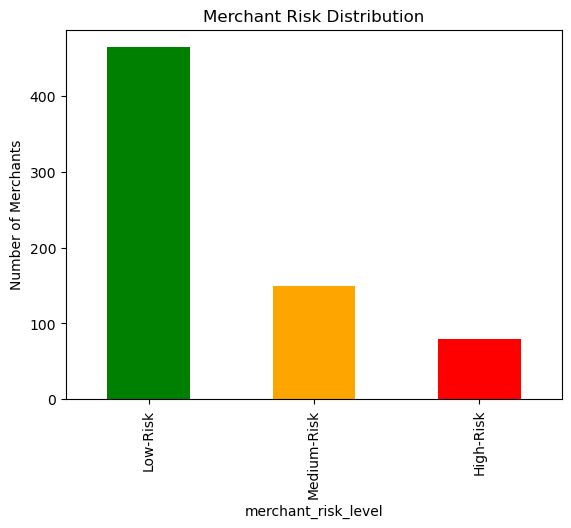

In [144]:
merchant_stats['merchant_risk_level'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Merchant Risk Distribution')
plt.ylabel('Number of Merchants')
plt.show()

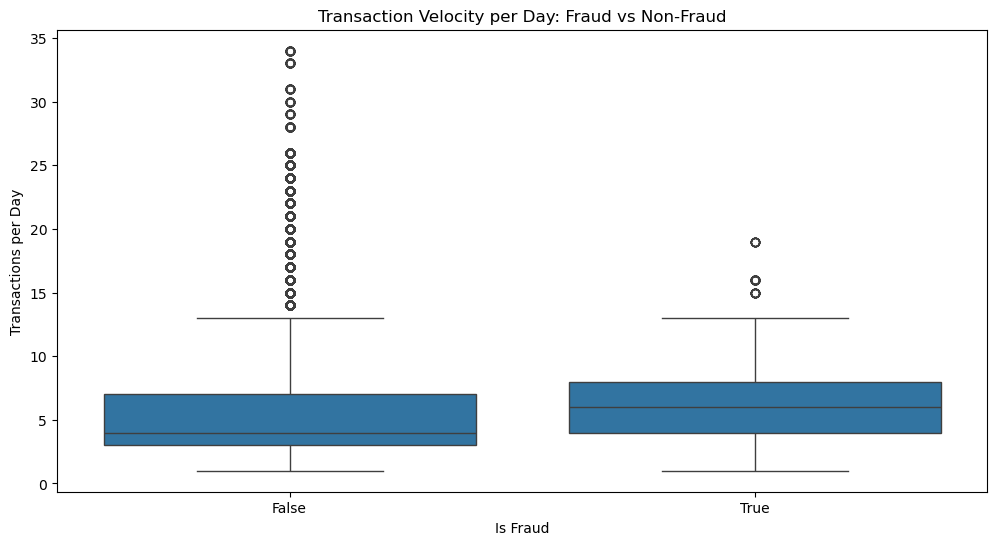

In [145]:
txn_per_day = df1.groupby(['name', 'date']).size().reset_index(name='txn_count_per_day')
df = df1.merge(txn_per_day, on=['name', 'date'], how='left')
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='is_fraud', y='txn_count_per_day')
plt.title('Transaction Velocity per Day: Fraud vs Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transactions per Day')
plt.show()

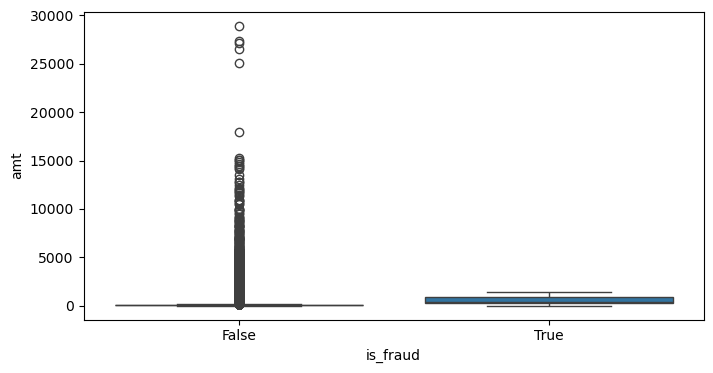

In [166]:
plt.figure(figsize=(8,4))
sns.boxplot(x='is_fraud', y='amt', data=df1)
plt.show()

Modelling: 

In [146]:
df1.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'job', 'trans_num', 'is_fraud', 'date', 'time', 'name', 'dayofweek',
       'month', 'year', 'hour'],
      dtype='object')

In [153]:
df1['weekday']=df1['date'].dt.dayofweek
df1['month_n']=df1['date'].dt.month

In [155]:
df1['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

selected_features = [
    'amt', 'hour', 'weekday', 'month_n', 'category', 'gender'
]
target = 'is_fraud'
df_model = df1[selected_features + [target]].copy()
df_model = pd.get_dummies(df_model, columns=['category', 'gender'], drop_first=True)
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: is_fraud
False    902418
True       5254
Name: count, dtype: int64
After SMOTE: is_fraud
False    902418
True     902418
Name: count, dtype: int64


In [159]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

C:\Users\MANI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       False       1.00      0.91      0.95    386751
        True       0.05      0.75      0.09      2252

    accuracy                           0.91    389003
   macro avg       0.52      0.83      0.52    389003
weighted avg       0.99      0.91      0.95    389003

ROC-AUC: 0.9064180172781848


In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000, solver='saga')
lr.fit(X_train_scaled, y_train_sm)

y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95    386751
        True       0.05      0.75      0.09      2252

    accuracy                           0.91    389003
   macro avg       0.52      0.83      0.52    389003
weighted avg       0.99      0.91      0.95    389003

ROC-AUC: 0.9064255882061026


In [162]:
feature_importance = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print(feature_importance.head(10))

amt                        4.453786
category_gas_transport     1.567680
category_grocery_pos       1.437450
category_personal_care     0.874551
category_kids_pets         0.821258
category_misc_pos          0.801836
category_food_dining       0.675335
category_health_fitness    0.666829
category_grocery_net       0.647555
category_travel            0.629374
dtype: float64


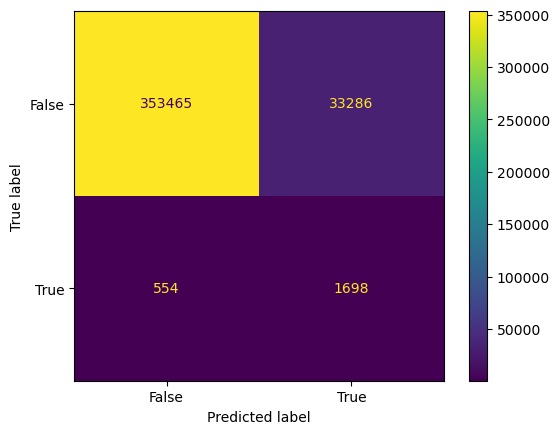

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()